# Exercise 05


## Using the example_retail_sales dataset:
- Standarize the dataset using np.log
- Using prophet forescast the next 6 months of the sales logarithm
- Predict the next 6 months of sales

In [29]:
import pandas as pd
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
df = pd.read_csv('example_retail_sales.csv')
#df = pd.DataFrame()
#df['ds'] = pd.to_datetime(passengers['Month'])
#df['y'] = passengers['#Passengers']

In [30]:
df.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


In [23]:
#df.ds = pd.to_datetime(df.ds)
#df.set_index('ds', inplace=True)

#df.head()

,y
ds,
1992-01-01,146376
1992-02-01,147079
1992-03-01,159336
1992-04-01,163669
1992-05-01,170068


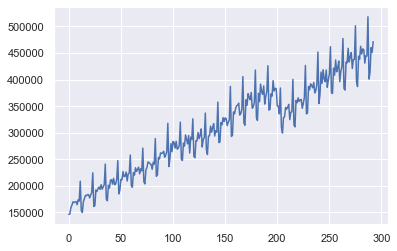

In [31]:
df['y'].plot();

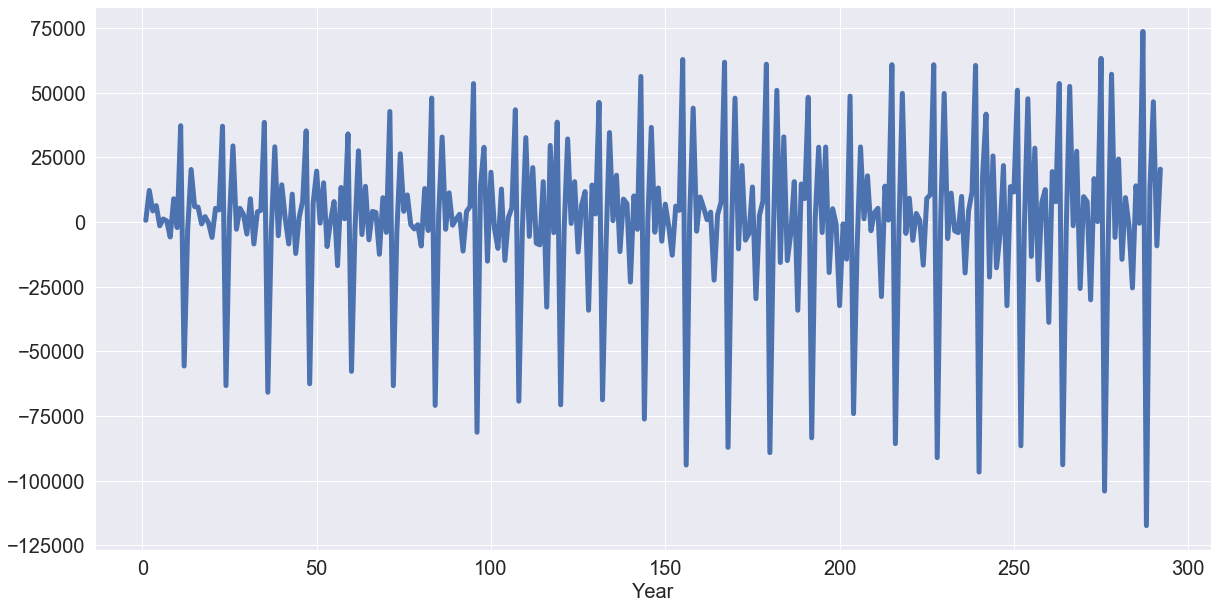

In [32]:
df['y'].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

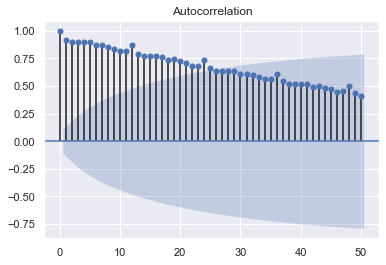

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['y'], lags=50);

In [34]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot


m = Prophet()


m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
X = df.values
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    
    future = m.make_future_dataframe(periods=1 * 6, freq='M')
    future.tail()
    
	model = ARIMA(history, order=(12,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

In [38]:
future = m.make_future_dataframe(periods = 6, freq='M')
future.tail()

,ds
294,2016-06-30
295,2016-07-31
296,2016-08-31
297,2016-09-30
298,2016-10-31
